In [1]:
import numpy as np
import pandas as pd
import statistics as sts
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

### Q7


In [2]:
df=pd.read_csv('Q7.csv')
df.head()

,Unnamed: 0,Points,Score,Weigh
0,Mazda RX4,3.90,2.620,16.46
1,Mazda RX4 Wag,3.90,2.875,17.02
2,Datsun 710,3.85,2.320,18.61
3,Hornet 4 Drive,3.08,3.215,19.44
4,Hornet Sportabout,3.15,3.440,17.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   Points      32 non-null     float64
 2   Score       32 non-null     float64
 3   Weigh       32 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


In [4]:
for i in df.columns[1:]:
    print(i,round(np.mean(df[i]),2),round(np.median(df[i]),2),round(sts.mode(df[i]),2),round(np.var(df[i]),2),round(np.std(df[i]),2),round(np.max(df[i])-np.min(df[i]),2))

Points 3.6 3.7 3.92 0.28 0.53 2.17
Score 3.22 3.32 3.44 0.93 0.96 3.91
Weigh 17.85 17.71 17.02 3.09 1.76 8.4


In [5]:
# Makinig DataFrame
pd.DataFrame(index=['Mean','Median','Mode','Variance','Standard Deviation','Range'],data={i:[round(np.mean(df[i]),2),round(np.median(df[i]),2),round(sts.mode(df[i]),2),round(np.var(df[i]),2),round(np.std(df[i]),2),round(np.max(df[i])-np.min(df[i]),2)] for i in df.columns[1:]})

,Points,Score,Weigh
Mean,3.60,3.22,17.85
Median,3.70,3.32,17.71
Mode,3.92,3.44,17.02
Variance,0.28,0.93,3.09
Standard Deviation,0.53,0.96,1.76
Range,2.17,3.91,8.40


In [6]:
# Checking for multimodals
for i in df.columns[1:]:
    iter_df=pd.DataFrame(df[i].value_counts())
    print(iter_df[iter_df.iloc[:,0]==iter_df.iloc[0,0]])

      Points
3.92       3
3.07       3
      Score
3.44      3
       Weigh
18.90      2
17.02      2


Seems Like Points and Weights are bimodal

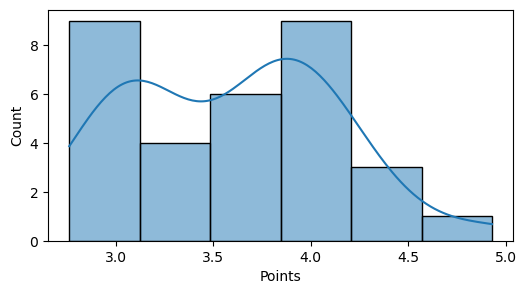

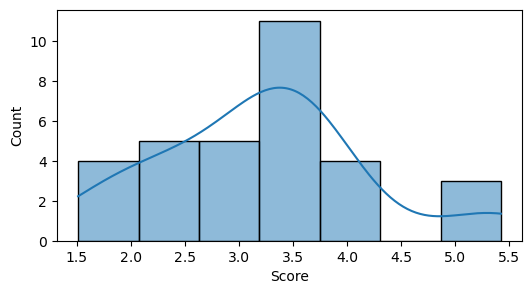

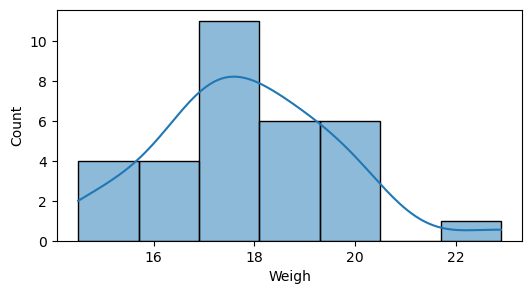

In [7]:
for i in df.columns[1:]:
    plt.figure(figsize=(6,3))
    sn.histplot(df[i],kde=True)
    plt.show()

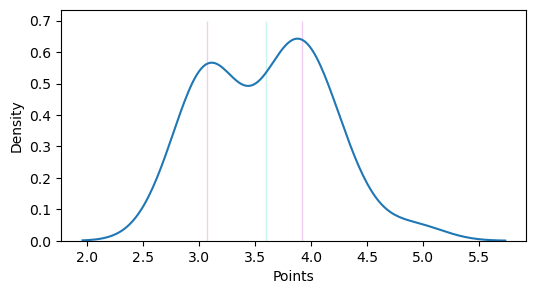

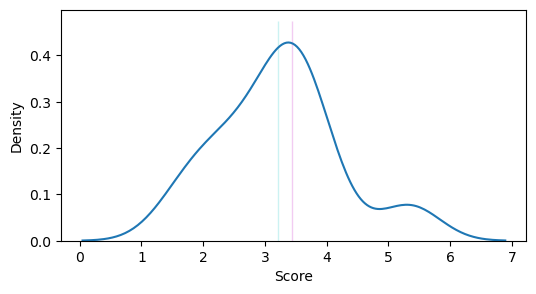

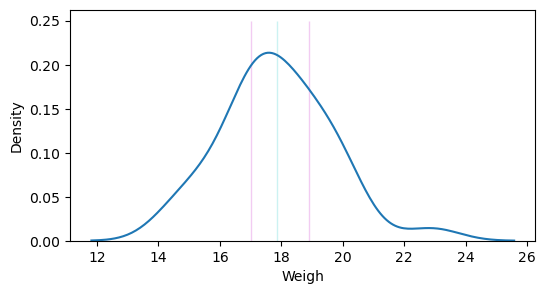

In [8]:
cont=0.7
for i in df.columns[1:]:
    plt.figure(figsize=(6,3))
    sn.kdeplot(df[i])
    sn.lineplot(x=[np.mean(df[i]),np.mean(df[i])],y=[0,cont],color='c')
    iter_df=pd.DataFrame(df[i].value_counts())
    n_iter=iter_df[iter_df.iloc[:,0]==iter_df.iloc[0,0]].index.values
    for i in range(len(n_iter)):
        sn.lineplot(x=[n_iter[i],n_iter[i]],y=[0,cont],color='m')
    plt.show()
    cont-=0.225

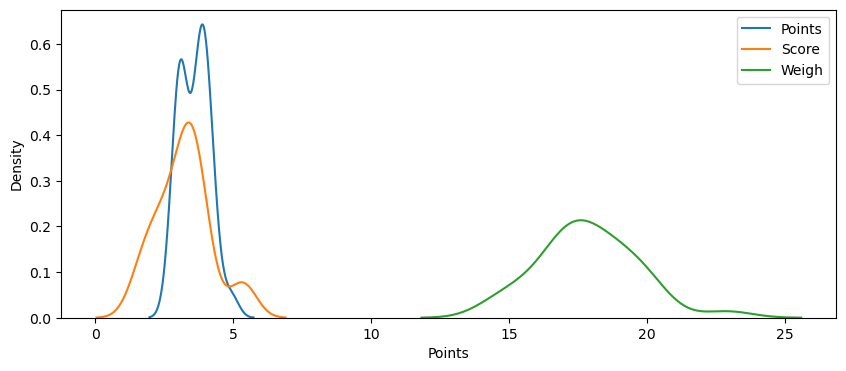

In [9]:
plt.figure(figsize=(10,4))
for i in df.columns[1:]:
    sn.kdeplot(df[i],label=i)
plt.legend()

### Q8

In [10]:
a=[108, 110, 123, 134, 135, 145, 167, 187, 199]
a

[108, 110, 123, 134, 135, 145, 167, 187, 199]

In [11]:
sum(a)/9

145.33333333333334

### Q9

#### a

In [12]:
a_df=pd.read_csv('Q9_a.csv',usecols=['speed','dist'])
a_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


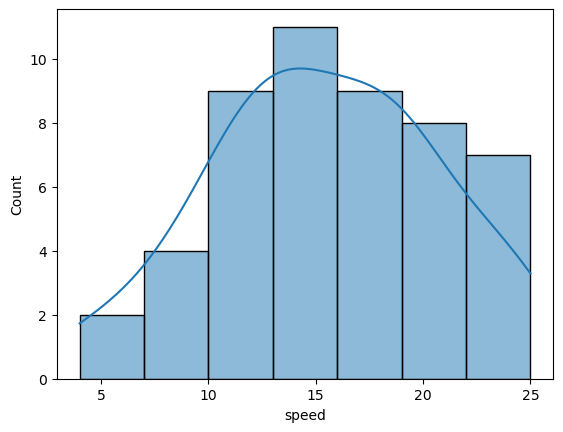

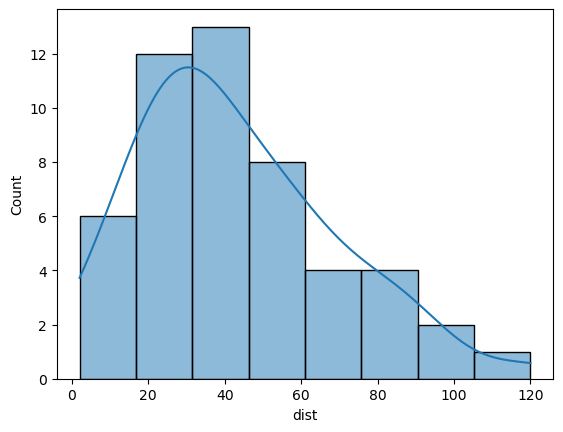

In [13]:
for i in a_df.columns:
    sn.histplot(a_df[i],kde=True)
    plt.show()

In [14]:
pd.DataFrame(data={i:[stats.skew(a_df[i]),stats.kurtosis(a_df[i])] for i in a_df.columns},index=['Skewness','Kurtosis'])

,speed,dist
Skewness,-0.113955,0.782484
Kurtosis,-0.577147,0.248019


#### b

In [15]:
b_df=pd.read_csv('Q9_b.csv',usecols=['SP','WT'])
b_df.head()

,SP,WT
0,104.185353,28.762059
1,105.461264,30.466833
2,105.461264,30.193597
3,113.461264,30.632114
4,104.461264,29.889149


<AxesSubplot:xlabel='SP', ylabel='Count'>

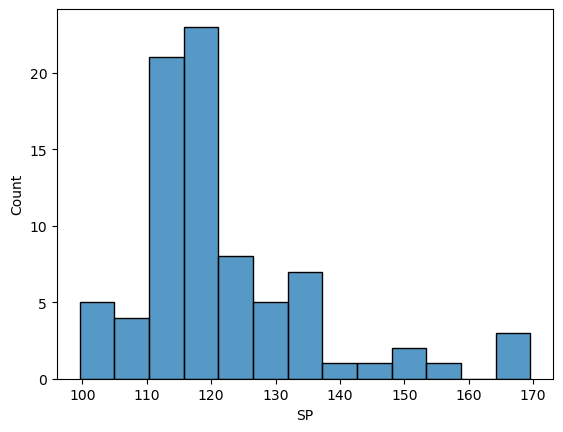

In [16]:
sn.histplot(b_df.SP)

<AxesSubplot:xlabel='WT', ylabel='Count'>

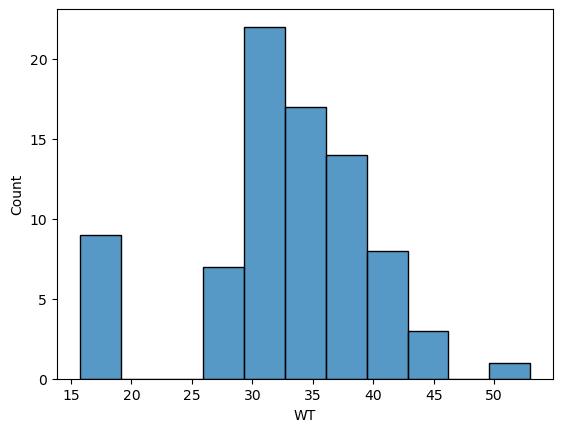

In [17]:
sn.histplot(b_df.WT)

In [18]:
pd.DataFrame(data={i:[stats.skew(b_df[i]),stats.kurtosis(b_df[i])] for i in b_df.columns},index=['Skewness','Kurtosis'])

,SP,WT
Skewness,1.581454,-0.603310
Kurtosis,2.723521,0.819466


### Q11

In [19]:
# for 94% confidence interval
stats.t.interval(0.94,1999,200,30/np.sqrt(2000))

(198.7376089443071, 201.2623910556929)

In [20]:
# for 98% confidence interval
stats.t.interval(0.98,1999,200,30/np.sqrt(2000))

(198.4381860483216, 201.5618139516784)

In [21]:
# for 96% confidence interval
stats.t.interval(0.96,1999,200,30/np.sqrt(2000))

(198.6214037429732, 201.3785962570268)

### Q12

In [22]:
# Storing Marks
scores = [34,36,36,38,38,39,39,40,40,41,41,41,41,42,42,45,49,56]

In [23]:
# Calculating statistical measures
print('Mean : ',np.mean(scores))
print('Median : ',np.median(scores))
print('Variance : ',np.var(scores))
print('Standard Deviation : ',np.std(scores))

Mean :  41.0
Median :  40.5
Variance :  24.11111111111111
Standard Deviation :  4.910306620885412


<AxesSubplot:ylabel='Count'>

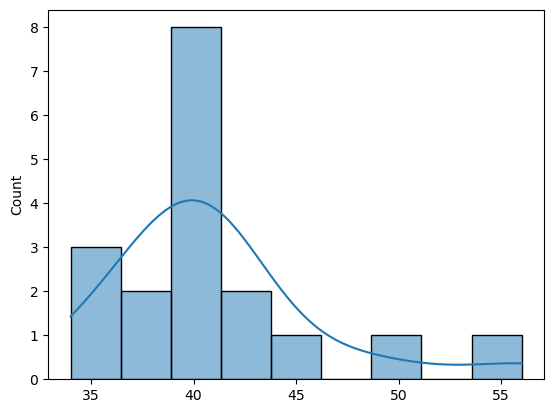

In [24]:
# Drawing Histogram
sn.histplot(scores,kde=True)

### Q20

In [25]:
df=pd.read_csv('Cars.csv')
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [26]:
mean_= df['MPG'].mean()
std_= df['MPG'].std()
mean_,std_

(34.422075728024666, 9.131444731795982)

In [27]:
# a. P(MPG>38)
1-stats.norm.cdf(38,loc=mean_,scale=std_)

0.3475939251582705

In [28]:
# b. P(MPG<40)
stats.norm.cdf(40,mean_,std_)

0.7293498762151616

In [29]:
# c. P (20<MPG<50)
stats.norm.cdf(50,mean_,std_)-stats.norm.cdf(20,mean_,std_)

0.8988689169682046

### Q21

#### a)

In [30]:
df= pd.read_csv('Cars.csv')
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [31]:
print('Skewness of MPG : ',stats.skew(df.MPG),'\nKurtosis of of MPG : ',stats.kurtosis(df.MPG))

Skewness of MPG :  -0.17463433818755686 
Kurtosis of of MPG :  -0.6477383960245926


<AxesSubplot:xlabel='MPG', ylabel='Count'>

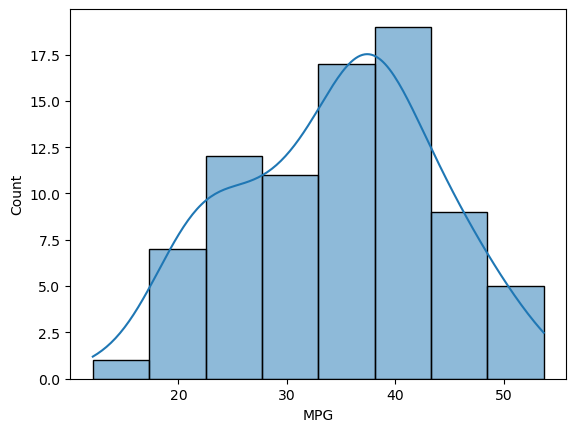

In [32]:
sn.histplot(df.MPG,kde=True)

MPG has a skew of -0.174 and kurtosis of -0.647, which is less than 0.<br>
This is not a normal distribution rather it forms a left-skewed platykurtic distribution.


#### b)


In [33]:
df=pd.read_csv('wc-at.csv')
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


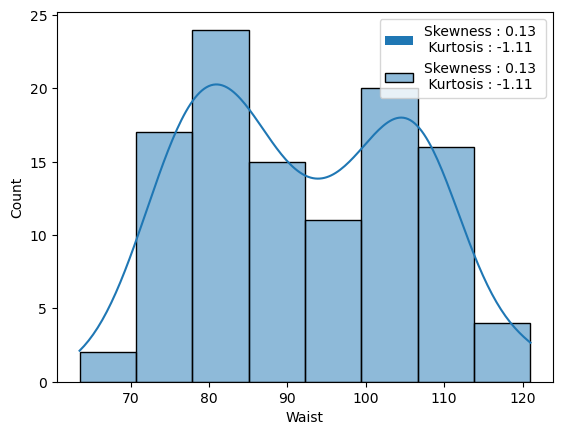

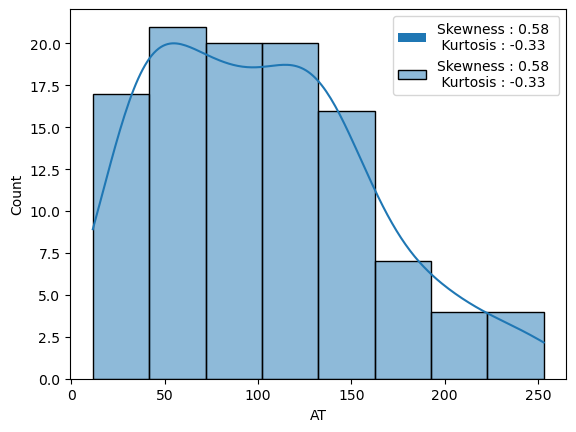

In [34]:
for i in df.columns:
    sn.histplot(df[i],kde=True,label=f'Skewness : {stats.skew(df[i]):.2f} \n Kurtosis : {stats.kurtosis(df[i]):.2f}')
    plt.legend()
    plt.show()

None of them forms a normal distribution.

### Q22)

In [35]:
# Z score of 90% Confidence Interval
stats.norm.ppf((1+0.9)/2)

1.6448536269514722

In [36]:
# Z score of 94% Confidence Interval
stats.norm.ppf((1+0.94)/2)

1.8807936081512509

In [37]:
# Z score of 60% Confidence Interval
stats.norm.ppf((1+0.6)/2)

0.8416212335729143

### Q23

In [38]:
# t score of 95% Confidence Interval
stats.t.ppf((1+0.95)/2,24)

2.0638985616280205

In [39]:
# t score of 96% Confidence Interval
stats.t.ppf((1+0.96)/2,24)

2.1715446760080677

In [40]:
# t score of 99% Confidence Interval
stats.t.ppf((1+0.99)/2,24)

2.796939504772804

### Q24

In [41]:
# Calculating t value
t=(260-270)/90*np.sqrt(18)
t

-0.4714045207910316

In [42]:
# Calculating probability of average life less than 260 days
stats.t.cdf(t,17)

0.32167253567098364

There is a .32 probability that randomly picked 18 bulbs will not last longer than 260 days 